## Preprocess model data: 

In [1]:
from pathlib import Path
import matplotlib as mpl
import xarray as xr

In [2]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

import time
import xarray as xr
import matplotlib.pyplot as plt

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge

In [6]:
from bs_fdbck.constants import path_measurement_data
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True)

In [8]:
import datetime 

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in model data. 

In [10]:
model_lev_i=-2
select_station = 'ATTO'

In [11]:
postproc_data = path_measurement_data /'model_station'/select_station
postproc_data.mkdir(parents=True, exist_ok=True)

In [12]:
models = ['ECHAM-SALSA','NorESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

## Cases:

In [13]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

## ECHAM SALSA:

In [14]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [15]:
case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

## Variables

In [16]:
varl =[
    'apm',
    'geom',
    'airdens',
    'tempair',
    'uw',
    'vw',
    'ccn02',
    'ccn10',
    'cod',
    'cwp',
    'ceff',
    'ceff_ct',
    'lcdnc',
    'lcdnc_ct',
    'clfr',
    'cl_time',
    'aot550nm',
    'aot865nm',
    'ang550865',
    'up_sw',
    'up_sw_cs',
    'up_sw_noa',
    'up_sw_cs_noa',
    'up_lw',
    'up_lw_cs',
    'up_lw_noa',
    'up_lw_cs_noa',
    'mmrtrN500',
    'mmrtrN250',
    'mmrtrN200',
    'mmrtrN100',
    'mmrtrN50',
    'mmrtrN3',
    'oh_con',
    'emi_monot_bio',
    'emi_isop_bio',
    'SO2_gas',
    'APIN_gas',
    'TBETAOCI_gas',
    'BPIN_gas',
    'LIMON_gas',
    'SABIN_gas',
    'MYRC_gas',
    'CARENE3_gas',
    'ISOP_gas',
    'VBS0_gas',
    'VBS1_gas',
    'VBS10_gas',
    'ORG_mass',
] 

In [17]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [18]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-11-23 17:33:30,967 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
(click 8.0.1 (/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages), Requirement.parse('click<8,>=4.0'), {'rasterio'})
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [19]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

## LOAD NORESM

## Settings:

In [20]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [21]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [22]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [23]:
cases_noresm1 = ['OsloAero_intBVOC_f09_f09_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f09_f09_mg17_ssp245']

In [24]:
case_mod = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f09_f09_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

## Variables

In [25]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','SOA_SV',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      'isoprene',
      'SFisoprene',
       'monoterp',
       'SFmonoterp',
       'PS',
       'NNAT_0',
       #'NCONC00',
       'NCONC02',
       'NCONC03',
       'NCONC04',
       'NCONC05',
       'NCONC06',
       'NCONC07',
       'NCONC08',
       'NCONC09',
       'NCONC10',
       'NCONC11',
       'NCONC12',
       'NCONC13',
       'NCONC14',
       'NMR01',
       #'NMR00',
       #'SIGMA00',
       'SIGMA01',
       'NMR02',
       'SIGMA02',
       'NMR03',
       'SIGMA03',
       'NMR04',
       'SIGMA04',
       'NMR05',
       'SIGMA05',
       'NMR06',
       'SIGMA06',
       'NMR07',
       'SIGMA07',
       'NMR08',
       'SIGMA08',
       'NMR09',
       'SIGMA09',
       'NMR10',
       'SIGMA10',
       'NMR11',
       'SIGMA11',
       'NMR12',
       'SIGMA12',
       'NMR13',
       'SIGMA13',
       'NMR14',
       'SIGMA14',
       #'hyam','hybm',
       #'hyai','hybi',
       'N500',
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [26]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [27]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [28]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-11-23 17:33:34,683 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/N100_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD500_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/DOD440_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/ACTREL_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_full/H2SO4_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [29]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-11-23 17:33:36,847 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/N100_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD500_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/DOD440_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/ACTREL_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f09_f09_mg17_ssp245/H2SO4_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [30]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [31]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [32]:
dic_ds = {case_mod: ds_comb}

In [33]:
dic_mod_ca['NorESM'] = dic_ds.copy()

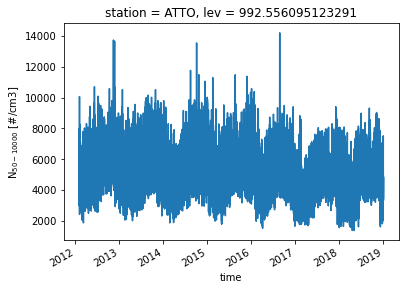

In [34]:
ds_comb['N50'].sel(station='ATTO').isel(lev=-1).plot()

In [35]:
vrlis = [f'NCONC{i:02}' for i in range(1,15)] +[f'NMR{i:02}' for i in range(1,15)] + [f'SIGMA{i:02}' for i in range(1,15)] 

In [36]:
from dask.diagnostics import ProgressBar

## SELECT STATION:


In [37]:
for mod in dic_mod_ca.keys():
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station=select_station)
        dic_mod_ca[mod][ca].load()

## Select level: 

In [38]:
for mod in dic_mod_ca.keys():
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].isel(lev=model_lev_i)
        print(dic_mod_ca[mod][ca].lev)
        dic_mod_ca[mod][ca].load()

<xarray.DataArray 'lev' ()>
array(46.)
Coordinates:
    lev      float64 46.0
    station  <U4 'ATTO'
Attributes:
    standard_name:  hybrid_sigma_pressure
    long_name:      hybrid level at layer midpoints
    formula:        hyam hybm (mlev=hyam+hybm*aps)
    formula_terms:  ap: hyam b: hybm ps: aps
    units:          level
    positive:       down
<xarray.DataArray 'lev' ()>
array(976.32540739)
Coordinates:
    station  <U4 'ATTO'
    lev      float64 976.3
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinate
    formula_terms:  a: hyam b: hybm p0: P0 ps: PS


# Functions:

In [39]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

## ADJUST ECHAM

In [40]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [41]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer,ds2df_echam

In [43]:
standard_air_density = 100*pressure/(R*temperature)

In [44]:
import datetime

In [45]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

In [46]:
dic_mod_ca['ECHAM-SALSA'][case_name_echam]

<xarray.Dataset>
Dimensions:        (time: 61368)
Coordinates:
  * time           (time) datetime64[ns] 2012-01-01T00:52:30 ... 2018-12-31T2...
    lev            float64 46.0
    station        <U4 'ATTO'
Data variables: (12/50)
    lon            (time) float64 -59.0 -59.0 -59.0 -59.0 ... -59.0 -59.0 -59.0
    APIN_gas       (time) float32 2.822e-10 3.357e-10 ... 1.219e-10 1.532e-10
    BPIN_gas       (time) float32 2.328e-10 2.887e-10 ... 9.057e-11 1.182e-10
    CARENE3_gas    (time) float32 4.756e-11 5.905e-11 ... 1.897e-11 2.482e-11
    ISOP_gas       (time) float32 7.543e-09 7.935e-09 ... 3.538e-09 4.103e-09
    LIMON_gas      (time) float32 9.003e-11 1.118e-10 ... 3.578e-11 4.679e-11
    ...             ...
    up_sw          (time) float32 65.74 65.74 63.56 63.56 ... 94.67 43.71 43.71
    up_sw_cs       (time) float32 35.55 35.55 35.56 35.56 ... 82.31 39.69 39.69
    up_sw_cs_noa   (time) float32 31.78 31.78 31.79 31.79 ... 67.69 32.18 32.18
    up_sw_noa      (time) float32 66.43 66.43 64.31 64.31 ... 82.65 37.72 37.72
    uw             (time) float32 -1.769 -1.428 -1.234 ... -2.635 -2.432 -2.34
    vw             (time) float32 -3.659 -3.438 -3.234 ... -2.656 -2.283 -1.649

In [47]:
standard_air_density = 100*pressure/(R*temperature)

In [48]:
ds_echam = dic_mod_ca['ECHAM-SALSA'][case_name_echam]
air_dens = ds_echam['apm']/(R*ds_echam['tempair'])

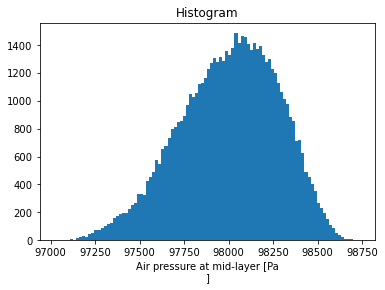

In [49]:
ds_echam['apm'].plot.hist(bins=100);

In [50]:

df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], 
                        take_daily_median=False, 
                        air_density=air_dens,
                        model_lev_i =model_lev_i)
df.index = df.reset_index()['time'].apply(fix_echam_time)
df

N3
N50
N100
N200
N250
N500
ORG_mass_conc
VBS1_gas_conc
VBS0_gas_conc
VBS10_gas_conc
cwp


,lon,lev,station,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,...,VBS0_gas_conc,VBS10_gas_conc,OAG,cwp,ceff_um,lcdnc_cm3,T_C,is_JJA,is_JA,isSummer
time,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00,-59.0002,46.0,ATTO,2.821519e-10,2.327658e-10,4.756145e-11,7.542697e-09,9.003484e-11,2.065036e-11,1.110949e-09,...,7.210706e-05,0.214239,1.517814,2.705714e+01,0.0,1.743982e-35,26.015625,False,False,False
2012-01-01 01:00:00,-59.0002,46.0,ATTO,3.356697e-10,2.886502e-10,5.905082e-11,7.934987e-09,1.117611e-10,2.457095e-11,1.150816e-09,...,1.199499e-05,0.215531,1.565143,3.512339e+01,0.0,6.643672e-35,25.879364,False,False,False
2012-01-01 02:00:00,-59.0002,46.0,ATTO,3.897681e-10,3.476375e-10,7.112257e-11,8.214004e-09,1.346019e-10,2.852998e-11,1.191303e-09,...,1.847369e-06,0.215602,1.611699,5.490721e+01,0.0,1.446207e-35,25.777008,False,False,False
2012-01-01 03:00:00,-59.0002,46.0,ATTO,4.394250e-10,4.041688e-10,8.258064e-11,8.321313e-09,1.562942e-10,3.215490e-11,1.240818e-09,...,3.476910e-07,0.209877,1.661339,7.217193e+01,0.0,-3.884656e-35,25.605713,False,False,False
2012-01-01 04:00:00,-59.0002,46.0,ATTO,4.848434e-10,4.577898e-10,9.330557e-11,8.297556e-09,1.766200e-10,3.546157e-11,1.302471e-09,...,1.534583e-07,0.198172,1.717620,8.473399e+01,0.0,1.332036e-34,25.360443,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,-59.0002,46.0,ATTO,7.663597e-11,5.648732e-11,1.175568e-11,2.384134e-09,2.221482e-11,5.651988e-12,1.832809e-09,...,3.322024e-03,0.093091,2.194537,8.685692e+00,0.0,3.859611e-35,27.451538,False,False,False
2018-12-31 20:00:00,-59.0002,46.0,ATTO,8.428263e-11,5.996868e-11,1.248659e-11,2.697680e-09,2.359097e-11,6.212560e-12,1.892321e-09,...,3.607584e-03,0.111313,2.284577,8.683560e-08,0.0,2.613744e-36,27.310242,False,False,False
2018-12-31 21:00:00,-59.0002,46.0,ATTO,9.434498e-11,6.780787e-11,1.415564e-11,3.011463e-09,2.672253e-11,6.948835e-12,1.999768e-09,...,3.683541e-03,0.137671,2.437590,7.346821e-16,0.0,1.584338e-34,27.134705,False,False,False


<AxesSubplot:xlabel='time'>

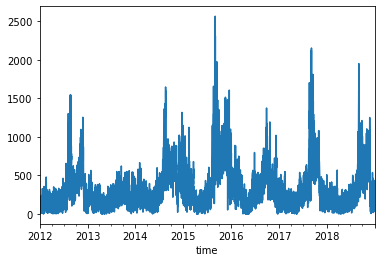

In [51]:
df['N100'].plot()

<AxesSubplot:xlabel='time'>

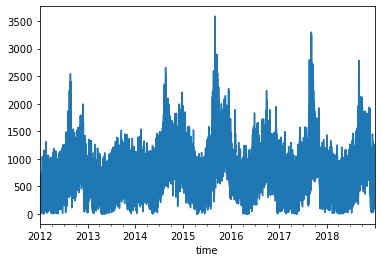

In [52]:
df['N50'].plot()

In [53]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

### NorESM

In [54]:
ds_noresm = dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']

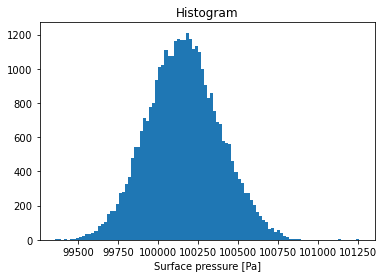

In [55]:
ds['PS'].sel(station=select_station).plot.hist(bins=100);

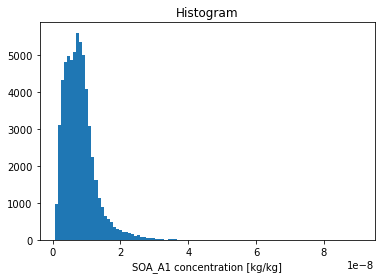

In [56]:
ds_noresm['SOA_A1'].plot.hist(bins=100);

In [57]:
air_dens = ds_noresm['PS']/(R*ds_noresm['T'])

In [58]:
dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], 
                                            model_lev_i=model_lev_i, 
                                            air_density=air_dens,
                                            select_hours_clouds=False,
                                            mask_cloud_values = False,
#                   from_hour=8,
#                   to_hour=14,
#                   varl_cl=None,
#                   varl_st = None,
          mask_summer = False,
                                            return_summer_median=False, 
                                            take_daily_median=False
                                )


dic_df_mod_case['NorESM'] = dic_df.copy()


hey
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR


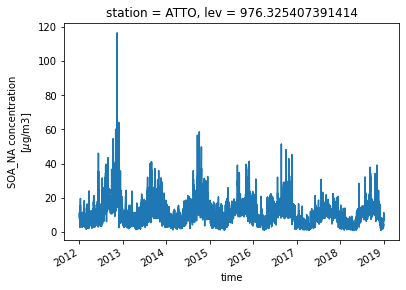

In [59]:
dic_mod_ca['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']['OA'].plot()

<AxesSubplot:xlabel='time'>

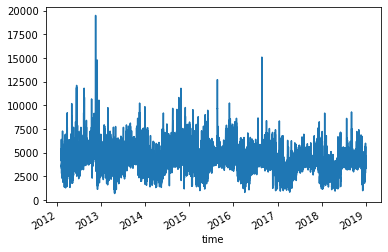

In [60]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['N50'].plot()

In [61]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']#['50-500'].plot()

,station,ACTREL,lev,BC_A,BC_AC,BC_AI,BC_AX,BC_N,BC_NI,COAGNUCL,...,SOA,OAG,OA,POA,SO4,hour,is_JJA,is_JA,isSummer,year
time,,,,,,,,,,,,,,,,,,,,,
2012-01-02 00:00:00,ATTO,0.0,976.325407,5.815709e-12,2.284618e-12,6.216762e-12,1.086100e-14,7.984544e-14,2.962090e-15,0.000015,...,7.855373,8.065325,8.036447,0.181074,0.140437,0,False,False,False,2012
2012-01-02 01:00:00,ATTO,0.0,976.325407,5.740620e-12,2.293239e-12,6.177176e-12,1.259311e-14,9.083385e-14,3.465085e-15,0.000015,...,8.084150,8.292442,8.265128,0.180978,0.141341,1,False,False,False,2012
2012-01-02 02:00:00,ATTO,0.0,976.325407,5.691387e-12,2.298453e-12,6.137951e-12,1.367037e-14,9.720762e-14,3.823664e-15,0.000015,...,8.274946,8.481831,8.455661,0.180715,0.141750,2,False,False,False,2012
2012-01-02 03:00:00,ATTO,0.0,976.325407,5.694673e-12,2.315673e-12,6.140177e-12,1.463017e-14,1.042964e-13,4.151001e-15,0.000015,...,8.451715,8.658324,8.633168,0.181454,0.142806,3,False,False,False,2012
2012-01-02 04:00:00,ATTO,0.0,976.325407,5.788481e-12,2.355007e-12,6.202035e-12,1.578037e-14,1.137945e-13,4.455077e-15,0.000015,...,8.623275,8.831461,8.807179,0.183905,0.145277,4,False,False,False,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 20:00:00,ATTO,0.0,976.325407,1.235065e-11,8.883554e-12,1.787866e-11,3.085038e-15,3.602730e-16,1.901244e-17,0.000010,...,6.922167,7.512405,7.434962,0.512795,0.460383,20,False,False,False,2018
2018-12-31 21:00:00,ATTO,0.0,976.325407,1.256580e-11,8.791570e-12,1.813574e-11,1.859320e-15,9.049519e-16,1.894527e-17,0.000011,...,7.470432,8.060226,7.989834,0.519402,0.466757,21,False,False,False,2018
2018-12-31 22:00:00,ATTO,0.0,976.325407,1.260016e-11,8.736460e-12,1.828789e-11,3.989247e-15,2.590719e-14,3.488456e-15,0.000011,...,7.949142,8.519107,8.472294,0.523152,0.474271,22,False,False,False,2018


<AxesSubplot:xlabel='time'>

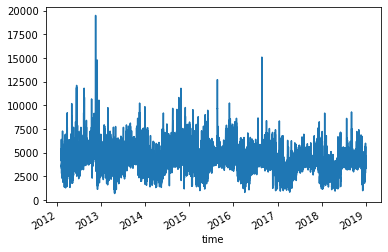

In [62]:
dic_df['OsloAero_intBVOC_f09_f09_mg17_fssp']['N50'].plot()

## SHIFT TIME to ATTO which is  european winter time EET UTC-4

In [63]:
import datetime

In [64]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind - datetime.timedelta(hours=4)

In [65]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

DatetimeIndex(['2011-12-31 20:00:00', '2011-12-31 21:00:00',
               '2011-12-31 22:00:00', '2011-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-01-01 20:00:00', '2012-01-01 21:00:00',
               '2012-01-01 22:00:00', '2012-01-01 23:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


## Renaming: 

#### NorESM

In [66]:
rn_dict_echam

{'ORG_mass_conc': 'OA', 'tempair': 'T'}

<AxesSubplot:xlabel='time'>

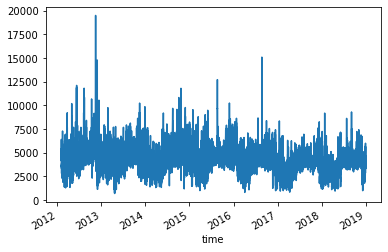

In [67]:
df = dic_df_mod_case['NorESM']['OsloAero_intBVOC_f09_f09_mg17_fssp']
#df = dic_df_mod_case['NorESM']['OsloAero_intBVOC_f19_f19_mg17_fssp']
df['N50'].plot()

In [68]:
df['T']

time
2012-01-01 20:00:00    299.336823
2012-01-01 21:00:00    299.434875
2012-01-01 22:00:00    299.483673
2012-01-01 23:00:00    299.453491
2012-01-02 00:00:00    299.328461
                          ...    
2018-12-31 16:00:00    300.953033
2018-12-31 17:00:00    300.811371
2018-12-31 18:00:00    300.743866
2018-12-31 19:00:00    300.634216
2018-12-31 20:00:00    300.539337
Name: T, Length: 61345, dtype: float32

## Write to file:

In [69]:
for mod in models:
    print(mod)
    dic_df_mod_case[mod]
    for ca in dic_df_mod_case[mod].keys():
        print(mod, ca)
        fn_out = postproc_data/f'{select_station}_station_{mod}_{ca}.csv'
        print(fn_out)
        dic_df_mod_case[mod][ca].to_csv(fn_out)

ECHAM-SALSA
ECHAM-SALSA SALSA_BSOA_feedback
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_ECHAM-SALSA_SALSA_BSOA_feedback.csv
NorESM
NorESM OsloAero_intBVOC_f09_f09_mg17_fssp
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/model_station/ATTO/ATTO_station_NorESM_OsloAero_intBVOC_f09_f09_mg17_fssp.csv


In [70]:
dic_df_mod_case[mod][ca]['OA']#.plot()

time
2012-01-01 20:00:00    8.036447
2012-01-01 21:00:00    8.265128
2012-01-01 22:00:00    8.455661
2012-01-01 23:00:00    8.633168
2012-01-02 00:00:00    8.807179
                         ...   
2018-12-31 16:00:00    7.434962
2018-12-31 17:00:00    7.989834
2018-12-31 18:00:00    8.472294
2018-12-31 19:00:00    8.623910
2018-12-31 20:00:00    8.569317
Name: OA, Length: 61345, dtype: float32